In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv

%matplotlib inline

## Loading the data

In [259]:
df = pd.read_csv("coursera_dataset.csv")

## Viewing the dataframe

In [260]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months
...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours


In [261]:
df['Duration'].unique()

array(['3 - 6 Months', '1 - 3 Months', '1 - 4 Weeks', 'Less Than 2 Hours'],
      dtype=object)

## Data Profiling

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Course Title  4999 non-null   object 
 1   Rating        4999 non-null   object 
 2   Provider      4999 non-null   object 
 3   Level         4999 non-null   object 
 4   Reviews       4999 non-null   float64
 5   Type          4999 non-null   object 
 6   Duration      4999 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.5+ KB


In [263]:
df.describe()

,Reviews
count,4999.000000
mean,2171.558112
std,9969.567436
min,0.000000
25%,34.500000
50%,224.000000
75%,1100.000000
max,273000.000000


In [264]:
df.shape

(4999, 7)

## -----

In [265]:
from ydata_profiling import ProfileReport

In [266]:
# profile = ProfileReport(df, title="Profiling Report")
# profile

## -----

## Data Quality Checks

### 1. Reliability:

In [267]:
# The data is reliable as it is sourced from Coursera, a globally recognized online learning platform.

### 2. Timeliness:

In [268]:
# The data is up-to-date for 2024

### 3. Consistency

In [269]:
# The values in the data are consistent, which ensures uniformity across its educational content

### 4. Relevance:

In [270]:
df.columns

Index(['Course Title', 'Rating', 'Provider', 'Level', 'Reviews', 'Type',
       'Duration'],
      dtype='object')

In [271]:
# All columns are relevant for our analysis

In [272]:
df.sample(10)

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
1810,IBM Cybersecurity Analyst Assessment,4.8,IBM,Intermediate,1200.0,Course,1 - 4 Weeks
1457,"Essential Aspects of Software, Hardware, and D...",3.5,Microsoft,Beginner,26.0,Course,1 - 4 Weeks
867,Architecting with Google Kubernetes Engine,4.6,Google Cloud,Beginner,5100.0,Specialization,3 - 6 Months
3006,Strategic Leadership and Management Capstone,4.7,University of Illinois Urbana-Champaign,Beginner,280.0,Course,1 - 3 Months
249,Psychological First Aid,4.8,Johns Hopkins University,Mixed,19000.0,Course,1 - 3 Months
2054,Sales Training: Techniques for a Human-Centric...,4.7,HubSpot Academy,Beginner,470.0,Course,1 - 3 Months
165,Salesforce Sales Operations,4.6,Salesforce,Beginner,1500.0,Professional Certificate,3 - 6 Months
386,Biostatistics in Public Health,4.8,Johns Hopkins University,Beginner,2200.0,Specialization,3 - 6 Months
1360,Data and Business Process Modeling with Micros...,3.4,Microsoft,Beginner,7.0,Course,1 - 4 Weeks
4255,Why Smart Executives Fail: Common Mistakes & W...,4.9,Dartmouth College,Beginner,305.0,Course,1 - 4 Weeks


### 5. Uniqueness:

In [273]:
df.duplicated().sum()

0

### 6. Completeness:

In [274]:
df.isnull().sum().sort_values(ascending = False)

Course Title    0
Rating          0
Provider        0
Level           0
Reviews         0
Type            0
Duration        0
dtype: int64

### 7. Check Accuracy:

In [275]:
df.dtypes

Course Title     object
Rating           object
Provider         object
Level            object
Reviews         float64
Type             object
Duration         object
dtype: object

In [276]:
df[df["Duration"] == "Course"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [277]:
df.shape

(4999, 7)

In [278]:
df = df[df["Duration"] != "Course"]

In [279]:
df[df["Reviews"] == "No reviews"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [280]:
(df["Reviews"] == "No reviews").sum()

0

In [281]:
df["Reviews"].unique()

array([1.51e+05, 3.50e+04, 1.12e+05, 3.00e+04, 8.30e+04, 1.91e+05,
       2.60e+04, 1.44e+05, 1.30e+05, 8.00e+04, 3.50e+03, 5.30e+04,
       4.20e+03, 4.70e+04, 6.50e+04, 8.40e+04, 2.50e+04, 4.10e+04,
       1.04e+05, 9.20e+04, 5.10e+04, 5.00e+04, 1.90e+04, 2.40e+04,
       4.50e+04, 1.60e+03, 9.00e+04, 1.30e+04, 2.30e+04, 1.60e+04,
       5.70e+03, 4.20e+04, 2.20e+04, 3.60e+04, 2.60e+03, 2.73e+05,
       2.10e+04, 8.44e+02, 3.90e+03, 2.10e+03, 1.52e+05, 3.40e+03,
       4.80e+03, 1.10e+04, 9.10e+03, 6.20e+03, 1.00e+04, 1.70e+04,
       3.10e+03, 2.00e+03, 8.00e+03, 7.20e+03, 3.20e+04, 6.90e+03,
       5.80e+03, 6.00e+03, 2.80e+04, 8.72e+02, 1.70e+03, 6.70e+04,
       1.80e+03, 1.40e+03, 2.25e+02, 1.99e+02, 2.20e+03, 1.90e+03,
       9.00e+03, 4.60e+03, 3.80e+03, 8.30e+03, 6.10e+03, 7.70e+03,
       8.50e+03, 2.00e+04, 1.80e+04, 4.70e+03, 7.50e+01, 1.10e+03,
       3.30e+03, 3.70e+03, 3.20e+03, 1.22e+05, 6.10e+04, 4.90e+04,
       9.30e+03, 3.60e+03, 2.70e+03, 8.01e+02, 8.70e+03, 5.60e

In [282]:
'''df['Reviews'] = df['Reviews'].astype(str)
df['Reviews'] = df['Reviews'].apply(lambda x: 
                                  float(x.replace('K', '')) * 1000 if 'K' in x else 
                                  (float(x) if x != 'No reviews' else 0.0))'''

"df['Reviews'] = df['Reviews'].astype(str)\ndf['Reviews'] = df['Reviews'].apply(lambda x: \n                                  float(x.replace('K', '')) * 1000 if 'K' in x else \n                                  (float(x) if x != 'No reviews' else 0.0))"

In [283]:
def convert_reviews(x):
    if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
        elif x == 'No reviews':
            return 0.0
        else:
            return float(x)
    return float(x)

# Apply the conversion
df['Reviews'] = df['Reviews'].apply(convert_reviews)

In [284]:
df["Reviews"].unique()

array([1.51e+05, 3.50e+04, 1.12e+05, 3.00e+04, 8.30e+04, 1.91e+05,
       2.60e+04, 1.44e+05, 1.30e+05, 8.00e+04, 3.50e+03, 5.30e+04,
       4.20e+03, 4.70e+04, 6.50e+04, 8.40e+04, 2.50e+04, 4.10e+04,
       1.04e+05, 9.20e+04, 5.10e+04, 5.00e+04, 1.90e+04, 2.40e+04,
       4.50e+04, 1.60e+03, 9.00e+04, 1.30e+04, 2.30e+04, 1.60e+04,
       5.70e+03, 4.20e+04, 2.20e+04, 3.60e+04, 2.60e+03, 2.73e+05,
       2.10e+04, 8.44e+02, 3.90e+03, 2.10e+03, 1.52e+05, 3.40e+03,
       4.80e+03, 1.10e+04, 9.10e+03, 6.20e+03, 1.00e+04, 1.70e+04,
       3.10e+03, 2.00e+03, 8.00e+03, 7.20e+03, 3.20e+04, 6.90e+03,
       5.80e+03, 6.00e+03, 2.80e+04, 8.72e+02, 1.70e+03, 6.70e+04,
       1.80e+03, 1.40e+03, 2.25e+02, 1.99e+02, 2.20e+03, 1.90e+03,
       9.00e+03, 4.60e+03, 3.80e+03, 8.30e+03, 6.10e+03, 7.70e+03,
       8.50e+03, 2.00e+04, 1.80e+04, 4.70e+03, 7.50e+01, 1.10e+03,
       3.30e+03, 3.70e+03, 3.20e+03, 1.22e+05, 6.10e+04, 4.90e+04,
       9.30e+03, 3.60e+03, 2.70e+03, 8.01e+02, 8.70e+03, 5.60e

In [285]:
df.dtypes

Course Title     object
Rating           object
Provider         object
Level            object
Reviews         float64
Type             object
Duration         object
dtype: object

In [286]:
df[df["Rating"] == "No rating"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration
280,Strategy and Game Theory for Management,No rating,IIMA - IIM Ahmedabad,Intermediate,0.0,Course,1 - 3 Months
306,Renew your CBRS Professional Installer certifi...,No rating,Google - Spectrum Sharing,Advanced,0.0,Course,1 - 3 Months
493,Music Production: Crafting Award-Worthy Songs,No rating,GRAMMY GO,Beginner,0.0,Specialization,1 - 3 Months
605,Workday in Action Series,No rating,Workday,Beginner,0.0,Course,1 - 3 Months
716,Cost Effectiveness and Decision Making for Hea...,No rating,National University of Singapore,Beginner,0.0,Course,1 - 4 Weeks
...,...,...,...,...,...,...,...
4988,Automated Reasoning with GPT Assistant API: Re...,No rating,Coursera Project Network,Intermediate,0.0,Guided Project,Less Than 2 Hours
4989,MySQL-for-Data-Engineering,No rating,Duke University,Beginner,0.0,Guided Project,Less Than 2 Hours
4991,Write Blog Posts With Outranking: Rank Article...,No rating,Coursera Project Network,Beginner,0.0,Guided Project,Less Than 2 Hours
4992,Using JavaScript with AI: Enhancing Developmen...,No rating,Coursera Project Network,Intermediate,0.0,Guided Project,Less Than 2 Hours


In [287]:
df[df["Provider"] == "No provider"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [288]:
df[df["Course Title"] == "No course"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration


In [289]:
# Splitting the column
df[['Start', 'End']] = df['Duration'].str.extract(r'(\d+)\s*-\s*(\d+)')
df['Unit'] = df['Duration'].str.extract(r'(\bMonths\b|\bWeeks\b)')

# Fill NaN values with 0
df['Start'] = df['Start'].fillna(0).astype(int)
df['End'] = df['End'].fillna(0).astype(int)

In [290]:
df.loc[df['Unit'] == 'Months', ['Start', 'End']] *= 4
df['Unit'] = 'Weeks'

In [291]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months,12,24,Weeks
...,...,...,...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours,0,0,Weeks
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours,0,0,Weeks


In [292]:
df[df["Duration"] == "Less Than 2 Hours"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit
582,Getting Started with Power BI Desktop,4.7,Coursera Project Network,Beginner,3800.0,Guided Project,Less Than 2 Hours,0,0,Weeks
775,Excel for Beginners: Introduction to Spreadsheets,4.7,Coursera Project Network,Beginner,113.0,Guided Project,Less Than 2 Hours,0,0,Weeks
889,Excel for Beginners: Pivot Tables,4.6,Coursera Project Network,Beginner,83.0,Guided Project,Less Than 2 Hours,0,0,Weeks
1019,HR Analytics- Build an HR dashboard using Powe...,4.6,Coursera Project Network,Beginner,273.0,Guided Project,Less Than 2 Hours,0,0,Weeks
1078,ChatGPT for Beginners: Save time with Microsof...,4.6,Coursera Project Network,Intermediate,159.0,Guided Project,Less Than 2 Hours,0,0,Weeks
...,...,...,...,...,...,...,...,...,...,...
4994,Kubernetes Engine: Qwik Start,4.8,Google Cloud,Beginner,16.0,Project,Less Than 2 Hours,0,0,Weeks
4995,Explore Einstein's theories of Relativity usin...,3.8,Coursera Project Network,Advanced,10.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4996,FIFA20 Data Exploration using Python,4.6,Coursera Project Network,Beginner,55.0,Guided Project,Less Than 2 Hours,0,0,Weeks
4997,Create an online presence with a free website ...,2.3,Coursera Project Network,Beginner,7.0,Guided Project,Less Than 2 Hours,0,0,Weeks


In [293]:
df = df[df['Duration'] != "Less Than 2 Hours"]

In [294]:
df[df["Duration"] == "Less Than 2 Hours"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit


In [295]:
df[df["Duration"] == 0]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit


In [296]:
df['Duration / Weeks'] = df['Start'].astype(str) + ' - ' + df['End'].astype(str)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\933786616.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [297]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration,Start,End,Unit,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,3 - 6 Months,12,24,Weeks,12 - 24
...,...,...,...,...,...,...,...,...,...,...,...
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4
4957,Executing the Iteration & PI with SAFe,4.1,Board Infinity,Intermediate,9.0,Course,1 - 4 Weeks,1,4,Weeks,1 - 4


In [298]:
df = df.drop(columns=['Duration','Start', 'End', 'Unit'])

In [299]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4
4957,Executing the Iteration & PI with SAFe,4.1,Board Infinity,Intermediate,9.0,Course,1 - 4


In [300]:
df.dtypes

Course Title         object
Rating               object
Provider             object
Level                object
Reviews             float64
Type                 object
Duration / Weeks     object
dtype: object

In [301]:
df = df[df["Reviews"] != 0]

In [302]:
df[df["Rating"] == "No rating"]

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks


In [303]:
df['Rating'] = df['Rating'].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16364\229805355.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [304]:
df.dtypes

Course Title         object
Rating              float64
Provider             object
Level                object
Reviews             float64
Type                 object
Duration / Weeks     object
dtype: object

In [305]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4952,Fundamentals of Machine Learning for Supply Chain,3.9,LearnQuest,Beginner,32.0,Course,1 - 4
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4


c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



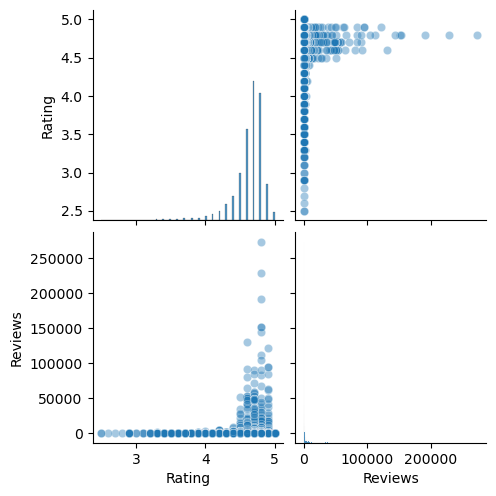

In [324]:

# Create the pairplot
sns.pairplot(df, kind='scatter', plot_kws={'alpha': 0.4})
plt.show()


In [307]:
fig_reviews = px.histogram(df, x='Reviews', nbins=10, title='Distribution of Reviews')
fig_reviews.show()

In [308]:
top_providers = df['Provider'].value_counts().nlargest(5).index
df_top_providers = df[df['Provider'].isin(top_providers)]

fig_rating_provider = px.bar(df_top_providers, x='Provider', y='Reviews', 
                             title='Reviews VS Provider',                           
                             color='Provider', height=600)
fig_rating_provider.show()

In [309]:
# Create a histogram to show the count of each rating category
fig_reviews_rating = px.histogram(df, x='Provider',
                                  title='Count of Each Rating Category',
                                  labels={'Rating': 'Rating Category'})

fig_reviews_rating.show()

In [310]:
rating_count = df['Rating'].value_counts()

# Create a bar chart to show the count of each rating category
fig_reviews_rating = px.bar(df['Rating'].value_counts().reset_index(),
                            x='Rating', y=rating_count,
                            title='Count of Each Rating Category',
                            labels={'y': 'Count'})

fig_reviews_rating.show()


In [311]:
# Create a histogram to show the count of each rating category
fig_reviews_rating = px.histogram(df, x='Rating',
                                  title='Count of Each Rating Category',
                                  labels={'Rating': 'Rating Category'})

fig_reviews_rating.show()

In [312]:
df_top_courses = df.nlargest(10, 'Reviews')

fig_duration_top_courses = px.bar(df_top_courses, x='Course Title', y='Duration / Weeks',
                                  title='Duration of Top 10 Courses by Number of Reviews',
                                  color='Duration / Weeks')
fig_duration_top_courses.show()

In [313]:
type_level_counts = df.groupby(['Type', 'Level']).size().reset_index(name='Count')

fig_type_level = px.bar(type_level_counts, x='Type', y='Count', color='Level',
                        title='Distribution of Course Type and Level',
                        height=600)
fig_type_level.show()

In [314]:
df

,Course Title,Rating,Provider,Level,Reviews,Type,Duration / Weeks
0,Google Data Analytics,4.8,Google,Beginner,151000.0,Professional Certificate,12 - 24
1,Google Cybersecurity,4.8,Google,Beginner,35000.0,Professional Certificate,12 - 24
2,Google Project Management:,4.8,Google,Beginner,112000.0,Professional Certificate,12 - 24
3,Google Digital Marketing & E-commerce,4.8,Google,Beginner,30000.0,Professional Certificate,12 - 24
4,Google UX Design,4.8,Google,Beginner,83000.0,Professional Certificate,12 - 24
...,...,...,...,...,...,...,...
4952,Fundamentals of Machine Learning for Supply Chain,3.9,LearnQuest,Beginner,32.0,Course,1 - 4
4953,Generative Design for Industrial Applications,4.8,Autodesk,Intermediate,88.0,Course,1 - 4
4955,Social Media and Social Content Strategy,4.4,Digital Marketing Institute,Beginner,62.0,Course,1 - 4
4956,Iteration Planning and PI in Scaled Agile Fram...,3.5,Board Infinity,Intermediate,6.0,Course,1 - 4


In [315]:
df.to_csv('cleaned_coursera_dataset.csv', index=False)
from IPython.display import FileLink
FileLink("cleaned_coursera_dataset.csv")

c:\Users\Admin\Bootcamp-DS\Usecase-8-Project-5\cleaned_coursera_dataset.csv